In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/placement-prediction-dataset/placementdata.csv")
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [11]:
from sklearn .preprocessing import LabelEncoder
data=df.copy()
catcols=['StudentID','CGPA','Internships','Projects','Workshops/Certifications','AptitudeTestScore','SoftSkillsRating','ExtracurricularActivities','PlacementTraining','SSC_Marks','HSC_Marks','PlacementStatus']
le=LabelEncoder()
for col in catcols:
    data[col]=le.fit_transform(data[col])

In [15]:
x=data.drop('PlacementStatus',axis=1)
y=data['PlacementStatus']

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.ensemble import  RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [18]:
ypred=model.predict(xtest)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1172
           1       0.76      0.72      0.74       828

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000

0.787


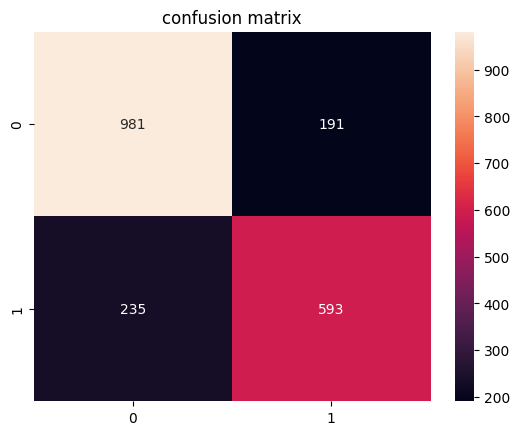

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt="d")
plt.title("confusion matrix")
plt.show()

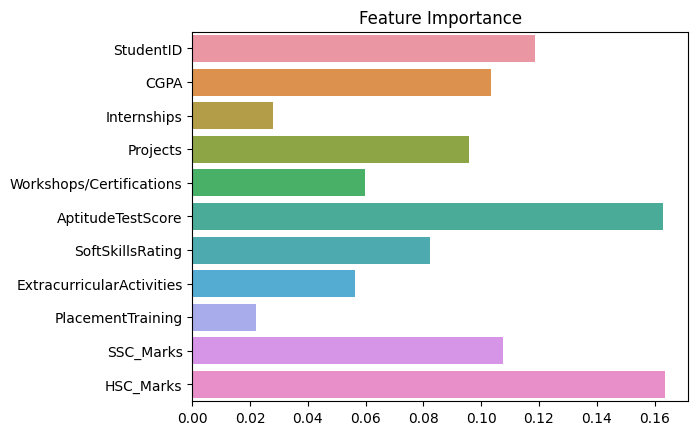

In [23]:
importances = model.feature_importances_
features = x.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


In [26]:
new_student = [[19, 8.7, 0, 1, 1, 67, 4,0,0,50,50]]  
model.predict(new_student)  


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])